## Task 4 - Fundamentals of Data Analysis

### Peter Finnerty

#### November 30th, 2020: 
**Simpson’s paradox** is a well-known statistical paradox
where a trend evident in a number of groups reverses when the groups are combined
into one big data set. 

* Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox. 

* You might create your x arrays using numpy.linspace and create the y array for each x using notation like y = a * x + b where you choose the a and b for each x , y pair to demonstrate the paradox. 

* You might see the Wikipedia page for Simpson’s paradox for inspiration.


### Summarising Simpson's Paradox

Simpson’s Paradox occurs when trends that appear when a dataset is separated into groups reverse when the data are aggregated (towardsdatascience.com).

A simple example of how this paradox can occur is in the choosing of a restaurant based on (i) male and female reviews and (ii) all reviews combined (towardsdatascience.com).

In this example a couple that are looking for the best recommended restaurant to eat at both look up user reviews for two restaurants (Sophia's and Carlo's). However, the first person looks up the restaurant that has a higher rating from men and women separately, whilst the second person looks up the highest reviews from both combined. 

It may seem counterintuitive that looking at reviews based on gender and looking at reviews for both groups combined may produce different ratings, but if the sample sizes are different and you look at rating alone this is possible.

Look at the table below that illustrates these contradictory trends:

![](https://miro.medium.com/max/700/1*l-F5-80NqgsGiDk2I4Z0Ew.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
rng = np.random.default_rng(0)

#### No permutation

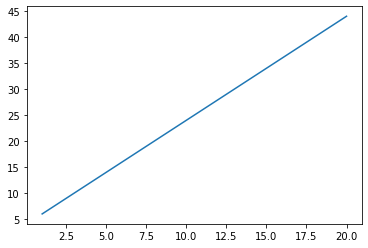

In [2]:
rng = np.random.default_rng(0)
x1 = np.linspace(1, 20, 100)
x1_r = rng.permutation(x1)
a1 = 2
b1 = 4
y1 = a1 * x1 + b1
plt.plot(x1, y1)
plt.show()

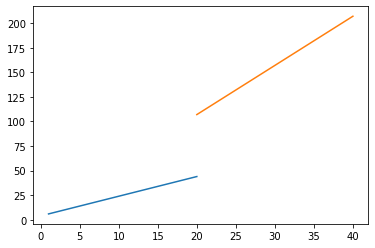

In [3]:
rng = np.random.default_rng(0)
x2 = np.linspace(20, 40, 100)
x2_r = rng.permutation(x2)
a2 = 5
b2 = 7
y2 = a2 * x2 + b2
plt.plot(x1, y1, x2, y2)
plt.show()

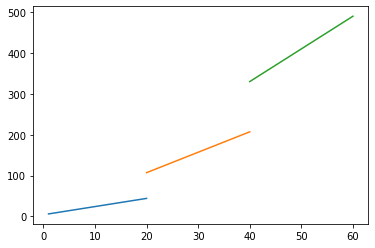

In [4]:
rng = np.random.default_rng(0)
x3 = np.linspace(40, 60, 100)
x3_r = rng.permutation(x3)
a3 = 8
b3 = 10
y3 = a3 * x3 + b3
plt.plot(x1, y1, x2, y2, x3, y3)
plt.show()

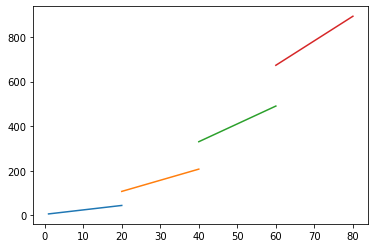

In [5]:
rng = np.random.default_rng(0)
x4 = np.linspace(60, 80, 100)
x4_r = rng.permutation(x4)
a4 = 11
b4 = 13
y4 = a4 * x4 + b4
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()

In [6]:
rng = np.random.default_rng(0)
df1_r = pd.DataFrame({'x1': x1.ravel(), 'y1': y1.ravel()})
df2_r = pd.DataFrame({'x2': x2.ravel(), 'y2': y2.ravel()})
df3_r = pd.DataFrame({'x3': x3.ravel(), 'y3': y3.ravel()})
df4_r = pd.DataFrame({'x4': x4.ravel(), 'y4': y4.ravel()})

#### With Arrays Altered to Show Reversal of Trend Between Datasets

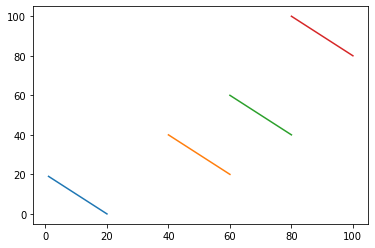

In [7]:
rng = np.random.default_rng(0)
x1 = np.linspace(1, 20, 100)
y1 = 20 - x1
x2 = np.linspace(40, 60, 100)
y2 = 80 - x2
x3 = np.linspace(60, 80, 100)
y3 = 100 - x2
x4 = np.linspace(80, 100, 100)
y4 = 140 - x2
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()

#### With Permutation

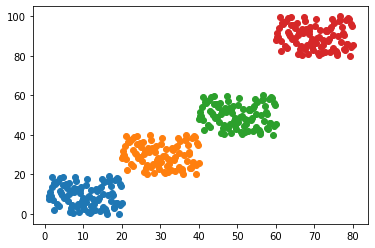

In [8]:
plt.scatter(x=x1_r, y=y1)
plt.scatter(x=x2_r, y=y2)
plt.scatter(x=x3_r, y=y3)
plt.scatter(x=x4_r, y=y4)
plt.show()

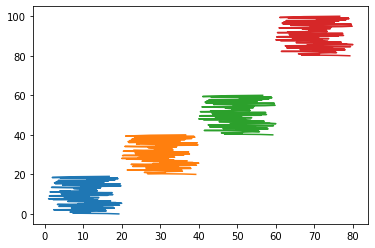

In [9]:
plt.plot(x1_r, y1, x2_r, y2, x3_r, y3, x4_r, y4)
plt.show()

In [14]:
df1 = pd.DataFrame({'x1_r': x1_r.ravel(), 'y1': y1.ravel()})
df2 = pd.DataFrame({'x2_r': x2_r.ravel(), 'y2': y2.ravel()})
df3 = pd.DataFrame({'x3_r': x3_r.ravel(), 'y3': y3.ravel()})
df4 = pd.DataFrame({'x4_r': x4_r.ravel(), 'y4': y4.ravel()})

In [15]:
df1

,x1_r,y1
0,16.737374,40.000000
1,7.909091,39.797980
2,4.838384,39.595960
3,1.959596,39.393939
4,18.848485,39.191919
...,...,...
95,8.868687,20.808081
96,11.747475,20.606061
97,7.333333,20.404040
98,16.161616,20.202020


#### With Exponential Distribution

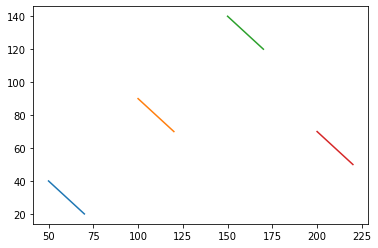

In [11]:
x1 = np.linspace(50, 70, 100)
y1 = 120 - x4
x2 = np.linspace(100, 120, 100)
y2 = 170 - x4
x3 = np.linspace(150, 170, 100)
y3 = 220 - x4
x4 = np.linspace(200, 220, 100)
y4 = 270 - x4
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()

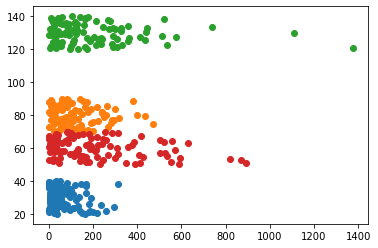

In [12]:
x1L = rng.exponential(x1)
x2L = rng.exponential(x2)
x3L = rng.exponential(x3)
x4L = rng.exponential(x4)

#dfl1 = pd.DataFrame(x1L)
#dfl2 = pd.DataFrame(x2L)
#dfl3 = pd.DataFrame(x3L)
#dfl4 = pd.DataFrame(x4L)

plt.scatter(x=x1L, y=y1)
plt.scatter(x=x2L, y=y2)
plt.scatter(x=x3L, y=y3)
plt.scatter(x=x4L, y=y4)
plt.show()

In [13]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

NameError: name 'df' is not defined

### Plotting Each Dataset as a Distribution

In [ ]:
x1 = np.linspace(1, 20, 100)
y1 = 20 - x1
rng = np.random.default_rng()
values = rng.poisson(x1)
values2 = rng.poisson(y1)

x2 = np.linspace(40, 60, 100)
y2 = 60 - x2
rng = np.random.default_rng()
values3 = rng.uniform(x2)
values4 = rng.uniform(y2)

x3 = np.linspace(80, 100, 100)
y3 = 100 - x2
rng = np.random.default_rng()
values5 = rng.rayleigh(x3)
values6 = rng.rayleigh(y3)


x4 = np.linspace(120, 140, 100)
y4 = 140 - x2
rng = np.random.default_rng()
values7 = rng.rayleigh(x4)
values8 = rng.rayleigh(y4)

sns.scatterplot(x=values, y=values2)
sns.scatterplot(x=values3, y=values4)
sns.scatterplot(x=values5, y=values6)
sns.scatterplot(x=values7, y=values8)
